# Chess: The Winning Move

![Chess Image](chess_notebook.jpg)

## 1. Question:
### Based on opening move will white win or lose ?

- [x] Getting Data
- [ ] Draw a plan
- [ ] Start Writing Code

## Dataset :

data features:
* Game ID;
* Rated (T/F);
* Start Time;
* End Time;
* Number of Turns;
* Game Status;
* Winner;
* Time Increment;
* White Player ID;
* White Player Rating;
* Black Player ID;
* Black Player Rating;
* All Moves in Standard Chess Notation;
* Opening Eco (Standardised Code for any given opening, list here);
* Opening Name;
* Opening Ply (Number of moves in the opening phase)

| Features  | Data Points |
| ------------- | ------------- |
| 15  | 20,000  |


### Import Libraries

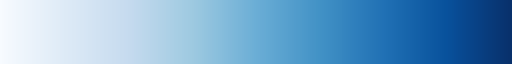

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.color_palette("Blues", as_cmap=True)


In [2]:
df = pd.read_csv('games.csv')

In [3]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [5]:
df2 = df.drop('moves',axis=1)

In [6]:
df2['victory_status'].value_counts()

resign       11147
mate          6325
outoftime     1680
draw           906
Name: victory_status, dtype: int64

C:\ProgramData\Anaconda3\envs\metis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='victory_status', ylabel='count'>

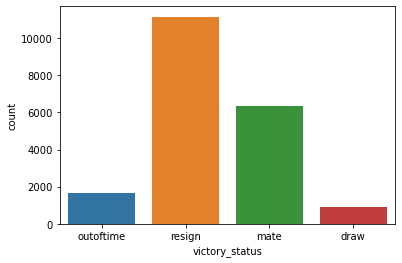

In [7]:
sns.countplot('victory_status',data=df2)

In [8]:
df2['white_rating'].value_counts(bins=500)

(1496.752, 1500.584]    885
(1500.584, 1504.416]    132
(1546.568, 1550.4]      130
(1561.896, 1565.728]    128
(1707.512, 1711.344]    127
                       ... 
(2477.744, 2481.576]      0
(2588.872, 2592.704]      0
(2592.704, 2596.536]      0
(2596.536, 2600.368]      0
(2535.224, 2539.056]      0
Name: white_rating, Length: 500, dtype: int64

above target data would require some engineering , due to the fact that resign is the opposite of winning. 

but the Scope is opening move for white... so ...resign is for white losing , mate is for white winning 

there seems to be some imbalance between losing and winning

Question to teacher : Multi class imbalance how to handle ?

C:\ProgramData\Anaconda3\envs\metis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


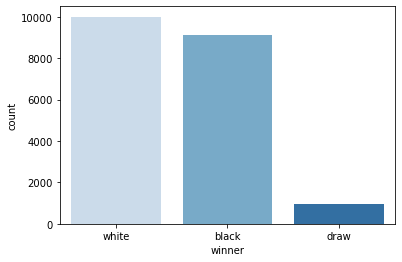

In [113]:
sns.countplot(df2['winner'],palette='Blues')
plt.savefig('target_imbalance.png')
plt.show();

In [10]:
df2.isna().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [11]:
df2['ratings_diff'] = df2['white_rating']-df2['black_rating']

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  opening_eco     20058 non-null  object 
 13  opening_name    20058 non-null  object 
 14  opening_ply     20058 non-null  int64  
 15  ratings_diff    20058 non-null  int64  
dtypes: bool(1), float64(2), int64(5), object(8)
memory usage: 2.3+ MB


<AxesSubplot:xlabel='ratings_diff', ylabel='Count'>

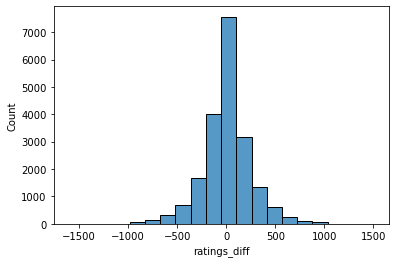

In [13]:
sns.histplot(df2['ratings_diff'],bins=20)

C:\ProgramData\Anaconda3\envs\metis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='opening_name', ylabel='count'>

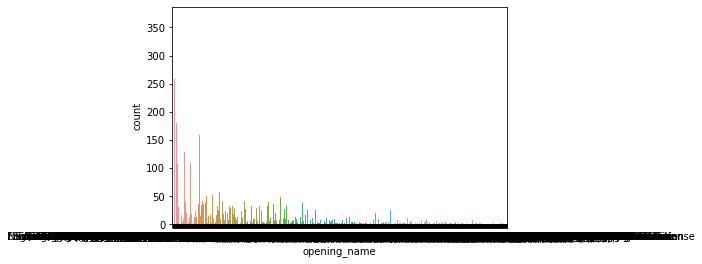

In [14]:
sns.countplot(df2['opening_name'])


In [15]:
df2['opening_eco'].value_counts()

A00    1007
C00     844
D00     739
B01     716
C41     691
       ... 
A33       1
D22       1
E44       1
B58       1
D19       1
Name: opening_eco, Length: 365, dtype: int64

In [16]:
# need short opening names with variations. as we have got a lot of non unique recrods
df2['opening_name'].nunique()

1477

In [17]:
df2['opening_name_shrt'] =df2['opening_name'].str.split(":")

In [18]:
df2

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_eco,opening_name,opening_ply,ratings_diff,opening_name_shrt
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,D10,Slav Defense: Exchange Variation,5,309,"[Slav Defense, Exchange Variation]"
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,B00,Nimzowitsch Defense: Kennedy Variation,4,61,"[Nimzowitsch Defense, Kennedy Variation]"
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,C20,King's Pawn Game: Leonardis Variation,3,-4,"[King's Pawn Game, Leonardis Variation]"
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,D02,Queen's Pawn Game: Zukertort Variation,3,-15,"[Queen's Pawn Game, Zukertort Variation]"
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,C41,Philidor Defense,5,54,[Philidor Defense]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,A80,Dutch Defense,2,471,[Dutch Defense]
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,A41,Queen's Pawn,2,37,[Queen's Pawn]
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,D00,Queen's Pawn Game: Mason Attack,3,-67,"[Queen's Pawn Game, Mason Attack]"
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,B07,Pirc Defense,4,133,[Pirc Defense]


In [19]:
df2['rated']= df2.rated.replace('True',0)

In [20]:
df2

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_eco,opening_name,opening_ply,ratings_diff,opening_name_shrt
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,D10,Slav Defense: Exchange Variation,5,309,"[Slav Defense, Exchange Variation]"
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,B00,Nimzowitsch Defense: Kennedy Variation,4,61,"[Nimzowitsch Defense, Kennedy Variation]"
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,C20,King's Pawn Game: Leonardis Variation,3,-4,"[King's Pawn Game, Leonardis Variation]"
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,D02,Queen's Pawn Game: Zukertort Variation,3,-15,"[Queen's Pawn Game, Zukertort Variation]"
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,C41,Philidor Defense,5,54,[Philidor Defense]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,A80,Dutch Defense,2,471,[Dutch Defense]
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,A41,Queen's Pawn,2,37,[Queen's Pawn]
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,D00,Queen's Pawn Game: Mason Attack,3,-67,"[Queen's Pawn Game, Mason Attack]"
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,B07,Pirc Defense,4,133,[Pirc Defense]


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 20058 non-null  object 
 1   rated              20058 non-null  bool   
 2   created_at         20058 non-null  float64
 3   last_move_at       20058 non-null  float64
 4   turns              20058 non-null  int64  
 5   victory_status     20058 non-null  object 
 6   winner             20058 non-null  object 
 7   increment_code     20058 non-null  object 
 8   white_id           20058 non-null  object 
 9   white_rating       20058 non-null  int64  
 10  black_id           20058 non-null  object 
 11  black_rating       20058 non-null  int64  
 12  opening_eco        20058 non-null  object 
 13  opening_name       20058 non-null  object 
 14  opening_ply        20058 non-null  int64  
 15  ratings_diff       20058 non-null  int64  
 16  opening_name_shrt  200

In [22]:
df3 = df2.drop(columns=['id','created_at','last_move_at','white_id','black_id','increment_code','opening_eco',],axis=1)

In [23]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rated              20058 non-null  bool  
 1   turns              20058 non-null  int64 
 2   victory_status     20058 non-null  object
 3   winner             20058 non-null  object
 4   white_rating       20058 non-null  int64 
 5   black_rating       20058 non-null  int64 
 6   opening_name       20058 non-null  object
 7   opening_ply        20058 non-null  int64 
 8   ratings_diff       20058 non-null  int64 
 9   opening_name_shrt  20058 non-null  object
dtypes: bool(1), int64(5), object(4)
memory usage: 1.4+ MB


In [24]:
df3.head()

,rated,turns,victory_status,winner,white_rating,black_rating,opening_name,opening_ply,ratings_diff,opening_name_shrt
0,False,13,outoftime,white,1500,1191,Slav Defense: Exchange Variation,5,309,"[Slav Defense, Exchange Variation]"
1,True,16,resign,black,1322,1261,Nimzowitsch Defense: Kennedy Variation,4,61,"[Nimzowitsch Defense, Kennedy Variation]"
2,True,61,mate,white,1496,1500,King's Pawn Game: Leonardis Variation,3,-4,"[King's Pawn Game, Leonardis Variation]"
3,True,61,mate,white,1439,1454,Queen's Pawn Game: Zukertort Variation,3,-15,"[Queen's Pawn Game, Zukertort Variation]"
4,True,95,mate,white,1523,1469,Philidor Defense,5,54,[Philidor Defense]


In [25]:
df['victory_status'].value_counts()

resign       11147
mate          6325
outoftime     1680
draw           906
Name: victory_status, dtype: int64

In [26]:
df3['opening_name_shrt'] = df3['opening_name'].str.split(":").str[0]

In [27]:
df3.head()

,rated,turns,victory_status,winner,white_rating,black_rating,opening_name,opening_ply,ratings_diff,opening_name_shrt
0,False,13,outoftime,white,1500,1191,Slav Defense: Exchange Variation,5,309,Slav Defense
1,True,16,resign,black,1322,1261,Nimzowitsch Defense: Kennedy Variation,4,61,Nimzowitsch Defense
2,True,61,mate,white,1496,1500,King's Pawn Game: Leonardis Variation,3,-4,King's Pawn Game
3,True,61,mate,white,1439,1454,Queen's Pawn Game: Zukertort Variation,3,-15,Queen's Pawn Game
4,True,95,mate,white,1523,1469,Philidor Defense,5,54,Philidor Defense


In [28]:
df3['opening_name_shrt'].value_counts()

Sicilian Defense                                                     2573
French Defense                                                       1306
Queen's Pawn Game                                                    1059
Italian Game                                                          981
King's Pawn Game                                                      917
                                                                     ... 
King's Gambit Accepted |  Bishop's Gambit |  Bogoljubov Variation       1
Alekhine Defense #3                                                     1
King's Indian |  Orthodox |  7...Nbd7 8.Re1                             1
Danish Gambit Accepted |  Schlechter Defense                            1
King's Gambit |  Falkbeer Countergambit |  Miles Gambit                 1
Name: opening_name_shrt, Length: 227, dtype: int64

In [29]:
df3['opening_name_shrt'] = df3['opening_name_shrt'].str.split("|").str[0]

In [30]:
df3['opening_name_shrt'] = df3['opening_name_shrt'].str.split("#").str[0]

In [31]:
df3['opening_name_shrt'].value_counts()

Sicilian Defense       2573
French Defense         1306
Queen's Pawn Game      1059
Italian Game            981
King's Pawn Game        917
                       ... 
Global Opening            1
Australian Defense        1
Doery Defense             1
Pterodactyl Defense       1
Valencia Opening          1
Name: opening_name_shrt, Length: 169, dtype: int64

In [32]:
df3['opening_name_shrt'] = df3['opening_name_shrt'].str.strip()

In [33]:
df3['opening_name_shrt'].value_counts()

Sicilian Defense       2632
French Defense         1412
Queen's Pawn Game      1233
Italian Game            981
King's Pawn Game        917
                       ... 
Valencia Opening          1
Doery Defense             1
Australian Defense        1
Pterodactyl Defense       1
Global Opening            1
Name: opening_name_shrt, Length: 143, dtype: int64

In [34]:
df3 = df3.drop(columns=['opening_name'], axis=1)

In [35]:
df3.head()

,rated,turns,victory_status,winner,white_rating,black_rating,opening_ply,ratings_diff,opening_name_shrt
0,False,13,outoftime,white,1500,1191,5,309,Slav Defense
1,True,16,resign,black,1322,1261,4,61,Nimzowitsch Defense
2,True,61,mate,white,1496,1500,3,-4,King's Pawn Game
3,True,61,mate,white,1439,1454,3,-15,Queen's Pawn Game
4,True,95,mate,white,1523,1469,5,54,Philidor Defense


In [36]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rated              20058 non-null  bool  
 1   turns              20058 non-null  int64 
 2   victory_status     20058 non-null  object
 3   winner             20058 non-null  object
 4   white_rating       20058 non-null  int64 
 5   black_rating       20058 non-null  int64 
 6   opening_ply        20058 non-null  int64 
 7   ratings_diff       20058 non-null  int64 
 8   opening_name_shrt  20058 non-null  object
dtypes: bool(1), int64(5), object(3)
memory usage: 1.2+ MB


In [37]:
df3.columns

Index(['rated', 'turns', 'victory_status', 'winner', 'white_rating',
       'black_rating', 'opening_ply', 'ratings_diff', 'opening_name_shrt'],
      dtype='object')

In [38]:
df3 = df3[['rated', 'turns', 'victory_status', 'white_rating','black_rating', 'opening_ply', 'ratings_diff', 'opening_name_shrt', 'winner']]

In [39]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rated              20058 non-null  bool  
 1   turns              20058 non-null  int64 
 2   victory_status     20058 non-null  object
 3   white_rating       20058 non-null  int64 
 4   black_rating       20058 non-null  int64 
 5   opening_ply        20058 non-null  int64 
 6   ratings_diff       20058 non-null  int64 
 7   opening_name_shrt  20058 non-null  object
 8   winner             20058 non-null  object
dtypes: bool(1), int64(5), object(3)
memory usage: 1.2+ MB


In [40]:
df3.winner.value_counts()

white    10001
black     9107
draw       950
Name: winner, dtype: int64

In [41]:
df_winner = pd.DataFrame(data={'winner':['draw','white','black'], 'value':[0,1,2]})
df_winner

,winner,value
0,draw,0
1,white,1
2,black,2


In [42]:
df3['winner'] = df3.winner.replace({'draw':0,'white':1,'black':2})
df3.head()

,rated,turns,victory_status,white_rating,black_rating,opening_ply,ratings_diff,opening_name_shrt,winner
0,False,13,outoftime,1500,1191,5,309,Slav Defense,1
1,True,16,resign,1322,1261,4,61,Nimzowitsch Defense,2
2,True,61,mate,1496,1500,3,-4,King's Pawn Game,1
3,True,61,mate,1439,1454,3,-15,Queen's Pawn Game,1
4,True,95,mate,1523,1469,5,54,Philidor Defense,1


In [43]:
# now we get dummie!

In [44]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rated              20058 non-null  bool  
 1   turns              20058 non-null  int64 
 2   victory_status     20058 non-null  object
 3   white_rating       20058 non-null  int64 
 4   black_rating       20058 non-null  int64 
 5   opening_ply        20058 non-null  int64 
 6   ratings_diff       20058 non-null  int64 
 7   opening_name_shrt  20058 non-null  object
 8   winner             20058 non-null  int64 
dtypes: bool(1), int64(6), object(2)
memory usage: 1.2+ MB


In [45]:
df3.describe()

,turns,white_rating,black_rating,opening_ply,ratings_diff,winner
count,20058.000000,20058.000000,20058.000000,20058.000000,20058.000000,20058.000000
mean,60.465999,1596.631868,1588.831987,4.816981,7.799880,1.406671
std,33.570585,291.253376,291.036126,2.797152,249.036667,0.579682
min,1.000000,784.000000,789.000000,1.000000,-1605.000000,0.000000
25%,37.000000,1398.000000,1391.000000,3.000000,-108.000000,1.000000
50%,55.000000,1567.000000,1562.000000,4.000000,3.000000,1.000000
75%,79.000000,1793.000000,1784.000000,6.000000,122.000000,2.000000
max,349.000000,2700.000000,2723.000000,28.000000,1499.000000,2.000000


In [46]:
df3_dummy = pd.get_dummies(df3)

In [47]:
df3_dummy.head()

,rated,turns,white_rating,black_rating,opening_ply,ratings_diff,winner,victory_status_draw,victory_status_mate,victory_status_outoftime,...,opening_name_shrt_Trompowsky Attack,opening_name_shrt_Valencia Opening,opening_name_shrt_Van Geet Opening,opening_name_shrt_Van't Kruijs Opening,opening_name_shrt_Vienna Game,opening_name_shrt_Wade Defense,opening_name_shrt_Ware Defense,opening_name_shrt_Ware Opening,opening_name_shrt_Yusupov-Rubinstein System,opening_name_shrt_Zukertort Opening
0,False,13,1500,1191,5,309,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,True,16,1322,1261,4,61,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,True,61,1496,1500,3,-4,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,True,61,1439,1454,3,-15,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,True,95,1523,1469,5,54,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# now we train a simple classification model . 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [49]:
#let's first split the data  .
X = df3_dummy.drop(columns=['winner'],axis=0)
y = df3['winner']

In [50]:
X.shape,y.shape

((20058, 153), (20058,))

In [51]:
# split data into train and test

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=79)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((12034, 153), (8024, 153), (12034,), (8024,))

In [53]:
lr_model = LogisticRegression(multi_class='multinomial',max_iter=2000).fit(X_train,y_train)

In [54]:
# predict the model resutls
y_pred = lr_model.predict(X_test)

In [55]:
print(accuracy_score(y_test,y_pred))

0.6739780658025922


In [99]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       398
           1       0.66      0.71      0.69      4021
           2       0.65      0.60      0.62      3605

    accuracy                           0.67      8024
   macro avg       0.77      0.76      0.76      8024
weighted avg       0.67      0.67      0.67      8024



In [100]:
report = classification_report(y_test, y_pred, output_dict=True)

In [103]:
df_report = pd.DataFrame(report).transpose()

In [104]:
df_report

,precision,recall,f1-score,support
0,0.994778,0.957286,0.975672,398.000000
1,0.664654,0.711763,0.687402,4021.000000
2,0.649175,0.600555,0.623919,3605.000000
accuracy,0.673978,0.673978,0.673978,0.673978
macro avg,0.769536,0.756535,0.762331,8024.000000
weighted avg,0.674074,0.673978,0.673179,8024.000000


In [108]:
print(df_report.to_markdown())

|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.994778 | 0.957286 |   0.975672 |  398        |
| 1            |    0.664654 | 0.711763 |   0.687402 | 4021        |
| 2            |    0.649175 | 0.600555 |   0.623919 | 3605        |
| accuracy     |    0.673978 | 0.673978 |   0.673978 |    0.673978 |
| macro avg    |    0.769536 | 0.756535 |   0.762331 | 8024        |
| weighted avg |    0.674074 | 0.673978 |   0.673179 | 8024        |


In [57]:
from sklearn import metrics

y_pred_proba = lr_model.predict_proba(X_test)

#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_proba,multi_class='ovr')

#print AUC score
print(auc)


0.8320203037921122


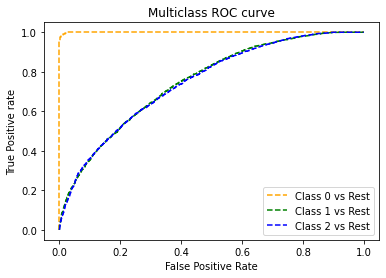

In [58]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_test, y_pred_proba[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

In [59]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [60]:
conf_mtx = confusion_matrix(y_test, y_pred)

In [61]:
#putting the cm into a data frame for better view
cm_df = pd.DataFrame(conf_mtx,
                     index = ['Draw','Win','Lose'], 
                     columns = ['Draw','Win','Lose'])

In [62]:
cm_df

,Draw,Win,Lose
Draw,381,5,12
Win,1,2862,1158
Lose,1,1439,2165


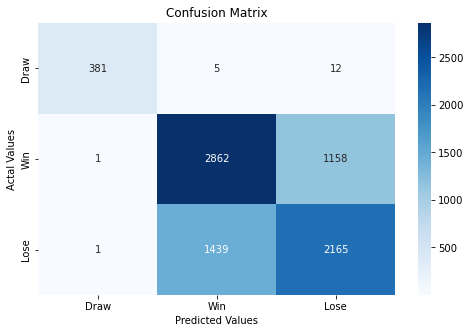

In [114]:
pd.set_option('float_format', '{:f}'.format)
#Plotting the confusion matrix
plt.figure(figsize=(8,5))

sns.heatmap(np.round(cm_df),fmt='', annot=True,cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.savefig('conf_matrix.png')
plt.show()
